# FAIR metrics - Biological roles of caffeine in ChEBI

by [Serena Bonaretti](https://sbonaretti.github.io), Maastricht University

**User-case: What are the biological roles of caffeine?**   

**ChEBI**
- *Repository*: https://www.ebi.ac.uk/chebi/  
- *Data*: Particle charge and mass  
- *Metadata*: ChEBI ID and definition  

Assumption: Data and metadata are in the same repository: https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:27732

Characteristics of the ChEBI API: 
- Documentation at https://www.ebi.ac.uk/chebi/webServices.do
- It uses the SOAP protocol -> python libray to use is `zeep`
- It provides 8 possible operations for query:  
  - getAllOntologyChildrenInPath  
  - getCompleteEntity (input: `chebiId` of element)
  - getCompleteEntityByList  
  - getLiteEntity (input: `chebiAsciiName` of element) 
  - getOntologyChildren  
  - getOntologyParents  
  - getStructureSearch  
  - getUpdatedPolymer  
  (To this list of operations, in terminal type: `python -mzeep 'https://www.ebi.ac.uk/webservices/chebi/2.0/webservice?wsdl'`)
- Because using `zeep`, output data format is `zeep` object (access fields with `.`) 

Note: 
- The ChEBI *ontology* can be queried using the REST API at https://www.ebi.ac.uk/ols/api (answer format is .json)

---

### Calculating FAIR metrics

[FAIR metrics:](#metrics) 
- [F1. (Meta)data are assigned a globally unique and persistent identifier](#F1) 
- [F2. Data are described with rich metadata](#F2) 
- [F3. Metadata clearly and explicitly include the identifier of the data it describes](#F3)  
- [F4. (Meta)data are registered or indexed in a searchable resource](#F4) 
- [A1. (Meta)data are retrievable by their identifier using a standardized communications protocol](#A1)    
- [A2. Metadata are accessible, even when the data are no longer available](#A2)  
- [I1. (Meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation](#I1) 
- [I2. Metadata use vocabularies that follow FAIR principles](#I2)  
- [I3. (Meta)data include qualified references to other (meta)data](#I3)   
- [R1.1. (Meta)data are released with a clear and accessible data usage license](#R11)  
- [R1.2. (Meta)data are associated with detailed provenance](#R12)  
- [R1.3. (Meta)data meet domain-relevant community standards](#R13)

[FAIR metric indicator](#indicator)

---

Imports:

In [1]:
import bs4
import requests
import xml.etree.ElementTree as ET
import zeep

Variables:

In [2]:
chemical         = 'caffeine'
repository_name  = 'ChEBI' 

repository_url   = 'https://www.ebi.ac.uk/chebi/'
repository_wsdl  = 'https://www.ebi.ac.uk/webservices/chebi/2.0/webservice?wsdl'
    
google_search    = 'https://google.com/search?q='
registry_api_url = 'https://www.re3data.org/api/v1/repositories'

rich_metadata_threshold = 10

In [5]:
element_list = client.service.getStructureSearch(chemical,'CHEBI NAME',0,'ALL') 

ValidationError: Missing element tanimotoCutoff (getStructureSearch.tanimotoCutoff)

Extract metadata from database:

In [3]:
client = zeep.Client(wsdl=repository_wsdl)
element_list = client.service.getLiteEntity(chemical,'CHEBI NAME',0,'ALL') 
# Parameters are: string, SearchCategory, maximumResults, stars
# To know possible parameter values: 
# - Type: Print (requests.get(wsdl).text)
# - Search for keyword (e.g. crt+F SearchCategory)

Forcing soap:address location to HTTPS


In [4]:
# extract the ID of the chemical (the query provides all items with one and/or two keywords, see: print (answer))
for i in range (0, len(element_list)):   
    if element_list[i].chebiAsciiName == chemical:
        # get the ID
        chemical_ID = element_list[i].chebiId #(e.g. CHEBI:50825)

# extract the metadata
all_metadata = client.service.getCompleteEntity(chemical_ID)
print (all_metadata)

{
    'chebiId': 'CHEBI:27732',
    'chebiAsciiName': 'caffeine',
    'definition': 'A trimethylxanthine in which the three methyl groups are located at positions 1, 3, and 7. A purine alkaloid that occurs naturally in tea and coffee.',
    'status': 'CHECKED',
    'smiles': 'Cn1cnc2n(C)c(=O)n(C)c(=O)c12',
    'inchi': 'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3',
    'inchiKey': 'RYYVLZVUVIJVGH-UHFFFAOYSA-N',
    'charge': '0',
    'mass': '194.19076',
    'monoisotopicMass': '194.08038',
    'entityStar': 3,
    'SecondaryChEBIIds': [
        'CHEBI:3295',
        'CHEBI:41472',
        'CHEBI:22982'
    ],
    'Synonyms': [
        {
            'data': '1,3,7-trimethyl-2,6-dioxopurine',
            'type': 'SYNONYM',
            'source': 'ChemIDplus',
            'Comments': []
        },
        {
            'data': '1,3,7-trimethylpurine-2,6-dione',
            'type': 'SYNONYM',
            'source': 'IUPHAR',
            'Comments': []
        },
    

---

<a name="metrics"></a>
### FAIR metrics

---

<a name="F1"></a>
#### F1. (Meta)data are assigned a globally unique and persistent identifier
*Interpretation*: Data and metadata have a unique identifier, either provided by the repository or by another institution

a. Unique identifier for data

In [4]:
# There is no unique identifier for data 
data_identifier = 0 # manual assignment

b. Unique identifier for metadata

In [5]:
# There is no unique identifier for metadata (ChEBI ID and definition - ChEBI ID contains an identifier but it has no identifier for itself)
metadata_identifier = 0 # manual assignment

If identifier contains DOI, it is unique and persistent 

In [6]:
if (data_identifier == 0 and metadata_identifier == 0):
    F1 = 0
print ("F1: " + str(F1) )

F1: 0


---

<a name="F2"></a>
#### F2. Data are described with rich metadata  

In [24]:
print ("number of elements in complete metadata: " + str(len(all_metadata)))
#print (all_metadata)

if len(all_metadata) > rich_metadata_threshold:
    F2 = 1
else: 
    F2 = 0
print ("F2: " + str(F2))


# # extract repository number 
# repository_number = metadata_str[metadata_str.rfind('/') : len(metadata_str)]
# # metadata_url
# metadata_url      = repository_api_url + repository_number
# print (metadata_url) 
# # access the repository metadata 
# r_repo = requests.get(metadata_url)

# if r_repo.status_code == 200:
#     F2 = 1
# else:
#     F2 = 0
# print ("F2: " + str(F2) )
# print ("  access status code: " + str(r_repo.status_code))

# r = requests.get("https://data.enanomapper.net/api-docs/")
#print (r.text)

number of elements in complete metadata: 23
F2: 1


---

<a name="F3"></a>
#### F3. Metadata clearly and explicitly include the identifier of the data it describes   

In [26]:
# initialize data_id
data_id = []

# repository-specific
if all_metadata.chebiId != 0:
    data_id = all_metadata.chebiId

# assign F3
if data_id != []:
    print ("data ID: " + str(data_id))
    F3 = 1
else:
    F3 = 0
print ("F3: " + str(F3) )

data ID: CHEBI:27732
F3: 1


---

<a name="F4"></a>
#### F4. (Meta)data are registered or indexed in a searchable resource

a. Search for repository in the generic search engine www.google.com

In [6]:
# query Google API for repository_url
r = requests.get(google_search + repository_url)
soup = bs4.BeautifulSoup(r.text, "html.parser")
link_elements = soup.select('.r a')

# find repository_url in the search output
counts = 0
for i in range(len(link_elements)):
    if (link_elements[i].find (repository_url) != -1):     
        counts = counts + 1
        

# assign F4: It is 0 if repository_url is not present  in the search output, it is 1 otherwise
if counts != 0:
    print (repository_url + " found in " + str(counts) + " urls out of " + str(len(link_elements)) )
    F4 = 1
else: 
    print (repository_url + " not found in the first " + str(len(link_elements)) + " urls")
    F4 = 0
    
print ("F4: " + str(F4))

https://www.ebi.ac.uk/chebi/ not found in the first 0 urls
F4: 0


b. Search for repository in the database registry www.re3data.org 

In [10]:
# contact the registry
r_registry = requests.get(registry_api_url)
# put output string in a structured xml tree
root = ET.fromstring(r_registry.text)

# look for the wanted repository
flag = 0
for i in range (0, len(root)):
    if root[i][1].text == repository_name: # first index is a <repository> group, 
                                           # second index is for the tags inside (<id>, <name>, <link>)
        flag = 1
        repository_index = i
        
if flag == 1:        
    F4 = 1
    print ("F4: " + str(F4))
    print ("  Index in list: " + str(repository_index))
    print ("  Tag          : " + str(root[repository_index][1].tag))
    print ("  Text         : " + str(root[repository_index][1].text))
    print ("  Tag          : " + str(root[repository_index][2].tag))
    print ("  Attribute    : " + str(root[repository_index][2].attrib)) # attributes do not have a closing tag

    metadata_str = str(root[repository_index][2].attrib["href"])
    print ("  Database metadata are in: " + str(metadata_str))
else: 
    F4 = 0
    print ("Repository not found")
    print ("F4: " + str(F4))

F4: 1
  Index in list: 2076
  Tag          : name
  Text         : ChEBI
  Tag          : link
  Attribute    : {'href': '/api/v1/repository/r3d100012626', 'rel': 'self'}
  Database metadata are in: /api/v1/repository/r3d100012626


---

<a name="A1"></a>
#### A1. Metadata are retrievable by their identifier using a standardized communications protocol   
**A1.1 the protocol is open, free, and universally implementable**   
**A1.2 the protocol allows for an authentication and authorization procedure, where necessary**  

In [11]:
# might need some further thinking
if F2 == 1:
    A1 = 1
else:
    A1 = 0
print ("A1: " + str(A1))   

A1: 1


---

<a name="A2"></a>
#### A2. Metadata are accessible, even when the data are no longer available  
*Interpretation:* If metadata do not have a unique identifier, there is no guarantee that they are accessible in the future 

In [12]:
if data_identifier == 0:
    A2 = 0
print ("A2: " + str(A2))    

A2: 0


---

<a name="I1"></a>
#### I1. Metadata use a formal, accessible, shared, and broadly applicable language for knowledge representation  

In [13]:
# ChEBI provides metadata in XLM format using its specific schema: 
# https://www.ebi.ac.uk/webservices/chebi/2.0/webservice?wsdl
# (Information retrieved manually at https://www.ebi.ac.uk/chebi/webServices.do)
I1 = 1 # manual assignment
print ("I1: " + str(I1))    

I1: 1


---

<a name="I2"></a>
#### I2. Metadata use vocabularies that follow FAIR principles

---

<a name="I3"></a>
#### I3. (Meta)data include qualified references to other (meta)data  
*Interpretation for this user-case*: (for enano mapper 

---

<a name="R11"></a>
#### R1.1. Metadata are released with a clear and accessible data usage license  
Metric name: Accessible usage license

In [14]:
# Looked for the word "license" in 
#import requests
#print (requests.get(wsdl).text)
# Word licence not found -> License is not included in metadata

In [15]:
R11 = 0

In [16]:
r = requests.get("https://data.enanomapper.net/api-docs")
print(r.text) 
# contains license

{
    "apiVersion":  "4.0.0-SNAPSHOT",
    "swaggerVersion": "1.2",
    "apis": [
        {
            "path": "/compound",
            "description": "OpenTox Chemical Compounds service"
        },
 		{
            "path": "/query/compound",
            "description": "Chemical structures search"
        },           
 		{
            "path": "/query/substance",
            "description": "Substance search"
        },        
        {
            "path": "/feature",
            "description": "OpenTox Feature service"
        },
        {
            "path": "/dataset",
            "description": "OpenTox Dataset service"
        },   
        {
            "path": "/algorithm",
            "description": "OpenTox Algorithms service"
        },
        {
            "path": "/model",
            "description": "OpenTox Prediction Models service"
        },
        {
            "path": "/task",
            "description": "OpenTox Task service (asynchronous jobs)"
        },  
      

---

<a name="R12"></a>
#### R1.2. (Meta)data are associated with detailed provenance  
See https://blog.datacite.org/exposing-doi-metadata-provenance/ with DOI https://doi.org/10.5438/wy92-xj57

<a name="R13"></a>
#### R1.3. (Meta)data meet domain-relevant community standards

---
---

<a name="indicator"></a>
### FAIR metric indicator

In [17]:
FAIR_metric_score = F1 + F2 + F3 + F4 + A1 + A2 + I1 + R11 # + I2 + I3 + + R12 + R13 
print ("The FAIR indicator for the chemical " + chemical + " is: " + str(FAIR_metric_score))

The FAIR indicator for the chemical caffeine is: 5


In [18]:
# use R to create the plot using ggplot2
import os # comment if used in mybinder, uncomment if used locally
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # comment if used in mybinder, uncomment if used locally 
%load_ext rpy2.ipython

In [19]:
import pandas as pd


#########################
# To be made automatic

A11 = -1
A12 = -1
I2  = -1 
I3  = -1 
R1  = -1 
R12 = -1 
R13 = -1 
#########################


metrics_name = ["F1", "F2", "F3", "F4", "A1", "A11","A12", "A2", "I1", "I2", "I3", "R1", "R11", "R12", "R13"]
metrics      = [ F1,   F2,   F3,   F4,   A1,   A11,  A12,   A2,   I1,   I2,   I3,   R1,   R11,   R12,   R13]
point_color  = ["F",  "F",  "F",  "F",  "A",  "A",  "A",   "A",  "I",  "I",  "I",  "R",  "R",   "R",   "R",]
axis         = range(1,len(metrics_name)+1)
data = {"metrics_name" : metrics_name,
        "caffeine"     : metrics,
        "x_axis"       : axis,
        "point_color"  : point_color
       }


df = pd.DataFrame (data)
df

,metrics_name,caffeine,x_axis,point_color
0,F1,0,1,F
1,F2,1,2,F
2,F3,1,3,F
3,F4,1,4,F
4,A1,1,5,A
5,A11,-1,6,A
6,A12,-1,7,A
7,A2,0,8,A
8,I1,1,9,I
9,I2,-1,10,I


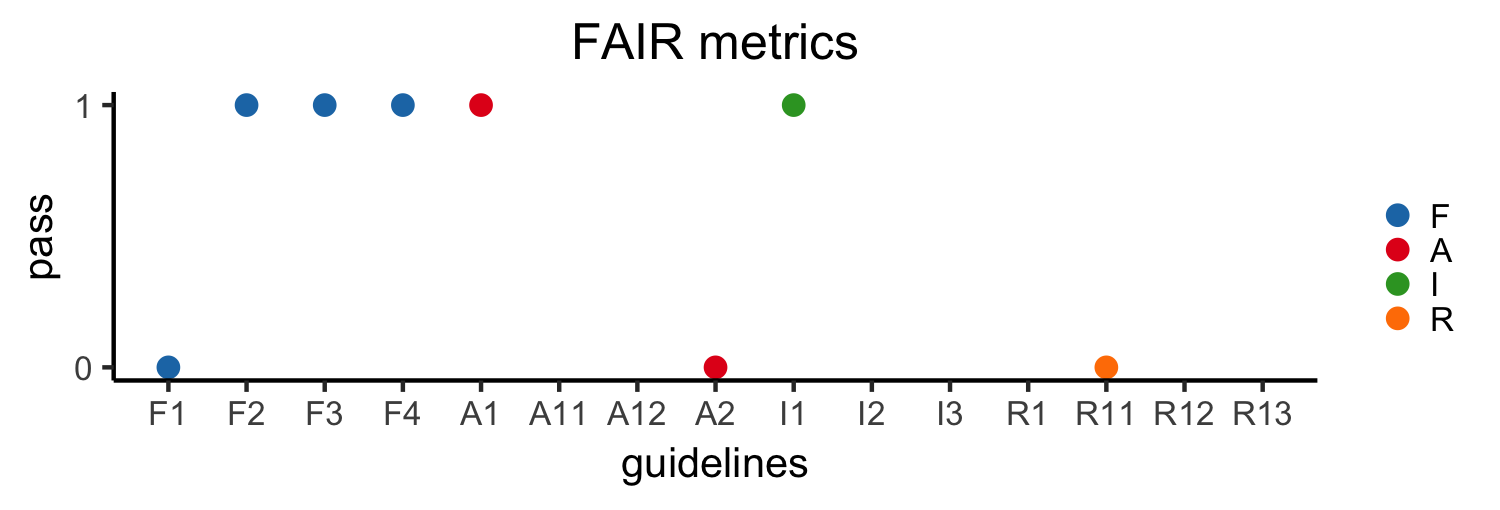

In [20]:
%%R -i df -w 5 -h 1.7 --units in -r 300

library(ggplot2)

title_text_size <- 12
axis_text_size  <- 10
tick_text_size  <- 8

n_of_metrics    <- nrow(df)

pl <- ggplot(data = df, aes(x=x_axis, y=caffeine, color=point_color)) + 
        # points
        geom_point(size=2) + 
        # background
        theme_classic() + 
        # axis ticks
        scale_x_continuous(limits=c(1,n_of_metrics), breaks=seq(1,n_of_metrics,1), labels=df$metrics_name) + 
        scale_y_continuous(limits=c(0,1.0), breaks=seq(0,1,1)) + 
        theme(axis.text.x = element_text(size = tick_text_size)) + 
        theme(axis.text.y = element_text(size = tick_text_size)) + 
        # axis text
        xlab ("guidelines") +
        ylab ("pass") +
        theme(text = element_text( size = axis_text_size )) + 
        # change colors
        scale_color_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00"),
                         labels = c("F", "A", "I", "R"),
                         breaks = c("F", "A", "I", "R")
                         ) + 
        # title
        ggtitle("FAIR metrics") +
        theme(plot.title = element_text(size = title_text_size, hjust = 0.5)) + 
        # legend
        theme(legend.text = element_text(size=tick_text_size),
              legend.key.size = unit(0.2, "cm")) + 
        labs(color="") # no legend title

pl

---
---

## Dependencies 

In [21]:
%reload_ext watermark
%watermark -v -m -p zeep

CPython 3.7.3
IPython 7.4.0

zeep 3.3.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [22]:
import datetime
now = datetime.datetime.now()
print ("Date: " + str(now.day) + " " + str(now.month) + " " + str(now.year))

Date: 27 5 2019
